# **Practice Lab: Data Wrangling**
In this lab, you will use the skills acquired in the module and address the issues of handling missing data, correct the data type of the dataframe attribute and execute the processes of data standardization and data normalization on specific attributes of the dataset.


# Objectives

After completing this lab you will be able to:

 - Handle missing data in different ways
 - Correct the data type of different data values as per requirement
 - Standardize and normalize the appropriate data attributes
 - Visualize the data as grouped bar graph using Binning
 - Converting a categorical data into numerical indicator variables


In [82]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filename, header=None)

In [85]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       238 non-null    float64
 1   1       239 non-null    object 
 2   2       239 non-null    object 
 3   3       239 non-null    object 
 4   4       239 non-null    object 
 5   5       239 non-null    object 
 6   6       239 non-null    object 
 7   7       235 non-null    object 
 8   8       239 non-null    object 
 9   9       239 non-null    object 
 10  10      239 non-null    object 
 11  11      234 non-null    object 
 12  12      239 non-null    object 
dtypes: float64(1), object(12)
memory usage: 24.4+ KB
None


In [86]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
1,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
2,1.0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
3,2.0,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
4,3.0,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244


In [87]:
print(df.columns) #Manually set the column names

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')


In [88]:
df.columns = ['NaN', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'Cpu_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB','Storage_GB_SSD', 'Weight_kg', 'Price']

In [89]:
df.head()

,NaN,Manufacturer,Category,Screen,GPU,OS,Cpu_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
1,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
2,1.0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
3,2.0,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
4,3.0,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244


In [94]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2) # column such that all values are rounded to nearest 2 decimal places
df.head()  #

,NaN,Manufacturer,Category,Screen,GPU,OS,Cpu_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
1,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
2,1.0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
3,2.0,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
4,3.0,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244


# Task - 1

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data. 


In [99]:
missing_data = df.isnull()
print(missing_data.head())

print("-------------------------------------------------------------------------------------------------") 

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

     NaN  Manufacturer  Category  Screen    GPU     OS  Cpu_core  \
0   True         False     False   False  False  False     False   
1  False         False     False   False  False  False     False   
2  False         False     False   False  False  False     False   
3  False         False     False   False  False  False     False   
4  False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
-------------------------------------------------------------------------------------------------
NaN
NaN
False    238
True      

# Task - 2

### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.

In [102]:
# Converting 'Weight_kg' to numeric, forcing errors to NaN
df['Weight_kg'] = pd.to_numeric(df['Weight_kg'], errors='coerce')

# Calculate the mean of the column, excluding NaN values
avg_weight = df['Weight_kg'].mean()

# Replace NaN values with the mean, and reassign the column back to the DataFrame
df['Weight_kg'] = df['Weight_kg'].fillna(avg_weight)


### Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.


In [105]:
# Find the most common screen size (mod)
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()

# Replace missing values with the most common value
df['Screen_Size_cm'] = df['Screen_Size_cm'].replace(np.nan, common_screen_size)


### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.


In [108]:
# Convert 'Weight_kg' and 'Screen_Size_cm' to numeric, invalid parsing will be set as NaN
df['Weight_kg'] = pd.to_numeric(df['Weight_kg'], errors='coerce')
df['Screen_Size_cm'] = pd.to_numeric(df['Screen_Size_cm'], errors='coerce')

# Optionally, handle NaN values (e.g., fill with mean or drop rows)
df['Weight_kg'] = df['Weight_kg'].fillna(df['Weight_kg'].mean())
df['Screen_Size_cm'] = df['Screen_Size_cm'].fillna(df['Screen_Size_cm'].mean())


# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [111]:
# Data standardization: convert weight from kg to pounds
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

# Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [114]:
# Convert 'CPU_frequency' to numeric, invalid parsing will be set as NaN
df['CPU_frequency'] = pd.to_numeric(df['CPU_frequency'], errors='coerce')

# Normalize the column by dividing each value by the maximum value in the column
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()


# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

In [117]:
# Convert to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Adım 2: Binning 
bins = np.linspace(df['Price'].min(), df['Price'].max(), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)


### Data Visualition (with histogram)

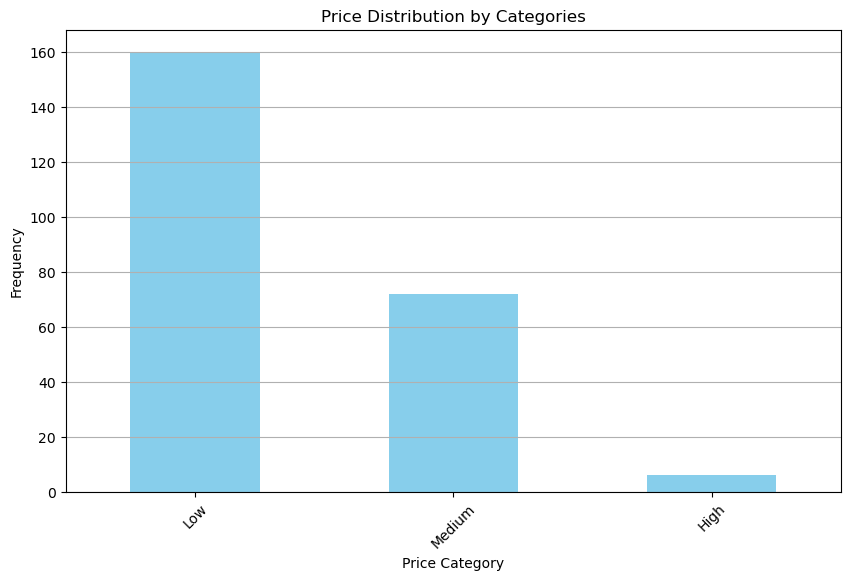

In [120]:
plt.figure(figsize=(10, 6))
df['Price-binned'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.title('Price Distribution by Categories')
plt.xticks(ticks=np.arange(len(group_names)), labels=group_names, rotation=45)
plt.grid(axis='y')
plt.show()

# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [123]:
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [125]:
print(df.head())

   NaN  Manufacturer  Category  GPU  OS  Cpu_core  Screen_Size_inch  \
0  NaN  Manufacturer  Category  GPU  OS  CPU_core         14.688655   
1  0.0          Acer         4    2   1         5         14.000000   
2  1.0          Dell         3    1   1         3         15.600000   
3  2.0          Dell         3    1   1         7         15.600000   
4  3.0          Dell         4    2   1         5         13.300000   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds   Price Price-binned  \
0            NaN  RAM_GB  Storage_GB_SSD       4.106221     NaN          NaN   
1       0.551724       8             256       3.528000   978.0          Low   
2       0.689655       4             256       4.851000   634.0          Low   
3       0.931034       8             256       4.851000   946.0          Low   
4       0.551724       8             128       2.690100  1244.0          Low   

   Screen-Full_HD  Screen-IPS_panel  
0           False             False  
1           Fals

In [127]:
df.head()

,NaN,Manufacturer,Category,GPU,OS,Cpu_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,NaN,Manufacturer,Category,GPU,OS,CPU_core,14.688655,NaN,RAM_GB,Storage_GB_SSD,4.106221,NaN,NaN,False,False
1,0.0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.528000,978.0,Low,False,True
2,1.0,Dell,3,1,1,3,15.600000,0.689655,4,256,4.851000,634.0,Low,True,False
3,2.0,Dell,3,1,1,7,15.600000,0.931034,8,256,4.851000,946.0,Low,True,False
4,3.0,Dell,4,2,1,5,13.300000,0.551724,8,128,2.690100,1244.0,Low,False,True
